### Introduction to Scientific Python: Part I
# Plotting
visualizing data

## Plotting

Plotting in Python is done through the `pyplot` module in the `matplotlib` package. More on models and packages later. For know, just know that, to use this functionality, you'll need to run the following commands in any notebook that uses this for plotting. 

In [2]:
# this line is ALWAYS needed for plotting
from matplotlib import pyplot as plt

# this line is needed to embed the plots in the notebook
%matplotlib inline

## Plotting single points

First let's plot a single point

`plt.plot(x, y, fomat_str)`
- `x`: x coordinate
- `y`: y coordinate
- `format_str`: formatting string

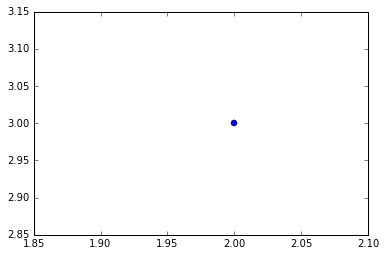

In [3]:
plt.plot(2, 3, 'o');

We can change the shape of the marker with the format string

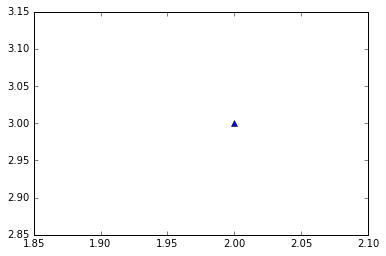

In [4]:
plt.plot(2, 3, '^');

We can also specify a color in the format string

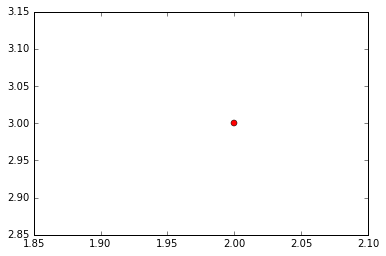

In [6]:
plt.plot(2, 3, 'or');

We can plot multiple points by plotting multiple times

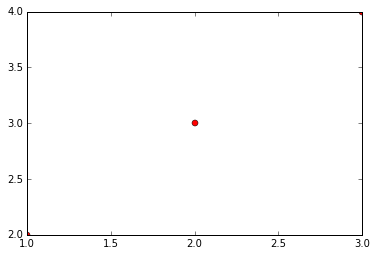

In [7]:
plt.plot(1, 2, 'ro');
plt.plot(2, 3, 'ro');
plt.plot(3, 4, 'ro');

As you can see, PyPlot doesn't always pick the best defualt values for the ranges of the x- and y-axes. We can set them by hand.

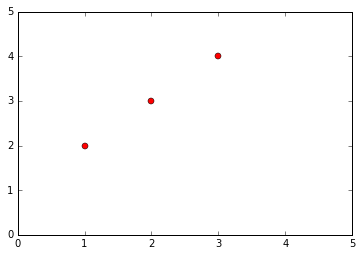

In [12]:
plt.plot(1, 2, 'ro');
plt.plot(2, 3, 'ro');
plt.plot(3, 4, 'ro');

plt.xlim([0, 5]);
plt.ylim([0, 5]);

## Plotting lines

To plot a line, make `x` and `y` into a `list` of coordinate values

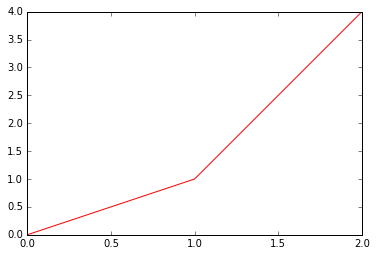

In [13]:
plt.plot([0, 1, 2], [0, 1, 4], 'r')

If we include marker shape in the format string, we can make our previous plot this way

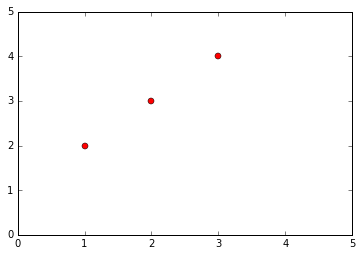

In [14]:
plt.plot([1, 2, 3], [2, 3, 4], 'ro');
plt.xlim([0, 5]);
plt.ylim([0, 5]);

We can also do both points and lines

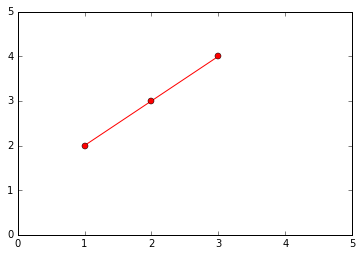

In [15]:
plt.plot([1, 2, 3], [2, 3, 4], 'ro-');
plt.xlim([0, 5]);
plt.ylim([0, 5]);

## Additional formatting

It's always important to label your axes!

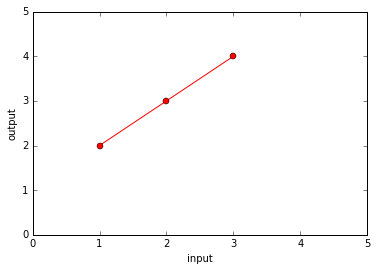

In [16]:
plt.plot([1, 2, 3], [2, 3, 4], 'ro-');
plt.xlim([0, 5]);
plt.ylim([0, 5]);

plt.xlabel('input');
plt.ylabel('output');

Nearly every aspect of these plots is editable -- titles, fonts, colors, tick marks, etc, etc. Google is your best friend for figuring out how to change these features.

## Multiple Plots

Let's make two different sets of data to play with.

In [17]:
x = range(6)

# y = 4*x
y1 = []
for val in x:
    y1 += [4*val]
    
# y = x**2
y2 = []
for val in x:
    y2 += [val**2]

In [18]:
x

[0, 1, 2, 3, 4, 5]

In [19]:
y1

[0, 4, 8, 12, 16, 20]

In [20]:
y2

[0, 1, 4, 9, 16, 25]

One way of comparing these two trends is to plot them on top of each other

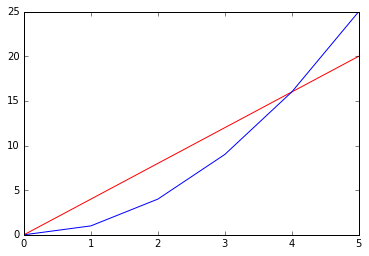

In [21]:
plt.plot(x, y1, 'r');
plt.plot(x, y2, 'b');

Another approach is to use two subplots

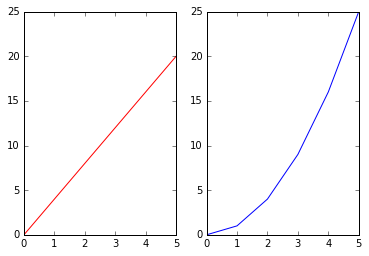

In [22]:
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
plt.plot(x, y1, 'r');
plt.ylim([0, 25]);

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
plt.plot(x, y2, 'b');
plt.ylim([0, 25]);

## Advanced Examples -- aka Eye Candy

Histograms

In [27]:
from pylab import *

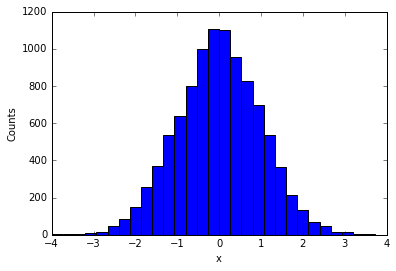

In [26]:
import numpy as np
import numpy.random
x = numpy.random.normal(size=10000)
plt.hist(x, bins=np.linspace(-4,4,31))
plt.xlabel('x')
plt.ylabel('Counts')

contour plots

(-1, 1)

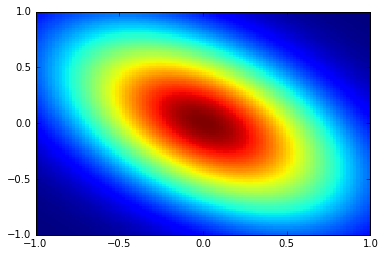

In [28]:
dx = 0.02
dy = 0.02
x = arange(-1,1+dx,dx)
y = arange(-1,1+dy,dy)
X, Y = meshgrid(x,y)

Z = exp((-X**2-Y**2-X*Y)/0.5)
Z = Z[:-1,:-1]
pcolor(X,Y,Z)
xlim(-1,1)
ylim(-1,1)

A heart in 3D

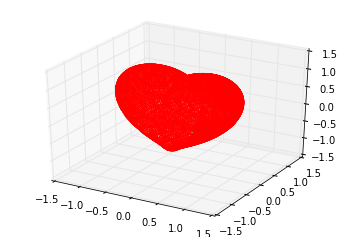

In [29]:
from mpl_toolkits.mplot3d import Axes3D

def heart_3d(x,y,z):
   return (x**2+(9/4)*y**2+z**2-1)**3-x**2*z**3-(9/80)*y**2*z**3
def plot_implicit(fn, bbox=(-1.5,1.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = figure()
    ax = fig.add_subplot(111, projection='3d')
    A = linspace(xmin, xmax, 100) # resolution of the contour
    B = linspace(xmin, xmax, 100) # number of slices
    A1,A2 = meshgrid(A,A) # grid on which the contour is plotted
    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z',colors=('r',))
        # [z] defines the only level to plot for this contour for this value of z
    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y',colors=('red',))
    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x',colors=('red',))
    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    show()

plot_implicit(heart_3d)
# credit: http://bytesizebio.net/2013/02/16/a-belated-valentines-day-post/